# Technical Test 

## Perkenalan

### Nama = `Fachmi Maris`



### Tujuan/Hasil yang Diharapkan
- Mampu membuat persamaan matrix covariance dengan code python
- Dengan dataset yang ada dapat membuat :
    - Aggregating, grouping, sorting, and cleaning data
    - Classification of data using different algorithms
    - A use case for logistics optimization
    - Building machine learning model

### Pernyataan Masalah
- Membuat persamaan persamaan matrix covariance dan membangun mesin pembelajaran berdasarkan dataset

## Import Library

In [1]:
# Define Libraries
import pandas as pd
import numpy as np
from scipy import stats
import pickle
from sklearn import set_config

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

#For Classifer Problem
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Split Dataset and Standarize Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor


#For Selection Features
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectKBest

#Evaluate Regression Models
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay,confusion_matrix 

#Error and Display Setting
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows',100)
import warnings
warnings.filterwarnings('ignore')
#For Deploy
import pickle
from sklearn import set_config

## 1. Membuat persamaan matrix covariance

In [2]:
def covariance_matrix(a, b) :
    # Kedua vektor memiliki panjang yang sama
    if len(a) != len(b):
        raise ValueError("Panjang vektor harus sama")
    
    n = len(a)

    # Hitung rata-rata dari vektor a dan b
    mean_a = np.mean(a)
    mean_b = np.mean(b)

    # Hitung Kovarians Matriks
    cov_matrix = np.zeros((2,2))
    for i in range(n):
        cov_matrix[0, 0] +=(a[i] - mean_a) * (a[i]-mean_a)
        cov_matrix[1, 1] +=(b[i] - mean_b) * (b[i]-mean_b)
        cov_matrix[0, 1] +=(a[i] - mean_a) * (b[i]-mean_b)

    # Dibagi dengan (n - 1)
    cov_matrix /= (n - 1)

    return cov_matrix

# contoh Penggunaan
a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])

result = covariance_matrix(a,b)
print("Covariance Matrix")
print(result)


Covariance Matrix
[[ 2.5 -2.5]
 [ 0.   2.5]]


## 2. Mengolah dataset

### Data Loading

Memanggil dataset yang disediakan untuk dianalisis.

In [3]:
df = pd.read_excel('Delivery truck trip data.xlsx')
df.head()

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,Planned_ETA,Current_Location,DestinationLocation,actual_eta,Curr_lat,Curr_lon,ontime,delay,OriginLocation_Code,DestinationLocation_Code,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,2020-08-21 18:59:01.000,"Vaniyambadi Rd, Valayambattu, Tamil Nadu 63575...","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA",2020-08-28 14:38:04.447,12.663500,78.649870,NaN,R,CHEPUZTVSHUA1,HOSHOSALLCCA2,2020-08-17 14:59:01,NaT,320.0,NaN,NaN,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,2020-08-31 20:22:22.827,"Unnamed Road, Oragadam Industrial Corridor, Va...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",2020-08-28 12:46:17.007,12.836757,79.954428,G,NaN,CHEORADMRCCB1,CHEMATDMROPA7,2020-08-27 16:21:52,NaT,103.0,NaN,NaN,RAMESH,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,2020-08-31 21:59:24.987,"570, National Hwy 48, Shenoy Nagar, Chennai, T...","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",2020-08-28 16:03:30.793,13.073956,80.225780,G,NaN,CHEPONLUTCCA4,CHEPONLUTCCA4,2020-08-27 17:57:04,NaT,300.0,NaN,NaN,GIRI,NaN,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,2020-09-01 04:48:24.503,"Singaperumal Koil - Sriperumbudur Rd, Oragadam...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",2020-08-28 12:50:27.997,12.836686,79.950560,G,NaN,CHEORADMRCCB1,CHEMATDMROPA7,2020-08-28 00:47:45,NaT,61.0,NaN,NaN,RAVI,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,2020-09-01 05:23:19.243,"Melmaruvathur, Tamil Nadu 603319, India","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",2020-08-28 14:22:50.127,12.429501,79.831556,G,NaN,CHENETLUTCCA1,CHENETLUTCCA1,2020-08-28 01:13:48,NaT,240.0,NaN,NaN,TAMIL,NaN,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


Menampilkan info seperti nama kolom, jumlah baris dan jenis data dengan menggunakan .info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   GpsProvider                         5927 non-null   object        
 1   BookingID                           6880 non-null   object        
 2   Market/Regular                      6880 non-null   object        
 3   BookingID_Date                      6880 non-null   datetime64[ns]
 4   vehicle_no                          6880 non-null   object        
 5   Origin_Location                     6880 non-null   object        
 6   Destination_Location                6880 non-null   object        
 7   Org_lat_lon                         6880 non-null   object        
 8   Des_lat_lon                         6880 non-null   object        
 9   Data_Ping_time                      5927 non-null   datetime64[ns]
 10  Planned_ETA             

Berdasarkan info di atas diketauhi bahwa dataset terdiri dari 31 kolom dengan jumlah baris terbanyak 6880 baris terdiri dari jenis data object, datetime, dan float. 

|      `COLUMN`      | DESKRIPSI                                                                                                       |
| :----------------: | :---------------------------------------------------------------------------------------------------------------- |
|    `GpsProvider`    | Penyedia layanan GPS yang digunakan untuk melacak perjalanan kendaraan.                                                                                       |
|      `BookingID`      | Nomor identifikasi untuk setiap pemesanan perjalanan.                                                             |
|  `Market/Regular`   | Menunjukkan apakah perjalanan tersebut merupakan bagian dari kategori "Market" atau "Regular  |
|  `BookingID_Date`   | Tanggal pemesanan  |
|  `vehicle_no`   | Nomor registrasi kendaraan  |
|  `Origin_Location `   | Lokasi asal perjalanan  |
|  `Destination_Location `   | Lokasi tujuan perjalanan  |
|  `Org_lat_lon dan Des_lat_lon `   | Koordinat geografis (lintang dan bujur) untuk lokasi asal dan tujuan  |
|  `Data_Ping_time `   | Waktu ketika data ping (sinyal) diterima dari kendaraan  |
|  `Planned_ETA `   | Perkiraan waktu kedatangan yang direncanakan  |
|  `Current_Location `   | Lokasi saat ini dari kendaraan  |
|  `actual_eta `   | Waktu kedatangan aktual  |
|  `Curr_lat dan Curr_lon `   | Koordinat geografis saat ini dari kendaraan  |
|  `ontime dan delay `   | Informasi apakah perjalanan tepat waktu atau mengalami keterlambatan  |
|  `OriginLocation_Code dan DestinationLocation_Code `   | Kode untuk lokasi asal dan tujuan  |
|  `trip_start_date dan trip_end_date `   | Tanggal awal dan akhir perjalanan  |
|  `TRANSPORTATION_DISTANCE_IN_KM `   | Jarak perjalanan dalam kilometer  |
|  `vehicleType `   | Jenis kendaraan yang digunakan  |
|  `Minimum_kms_to_be_covered_in_a_day `   | Jumlah minimum kilometer yang harus ditempuh dalam sehari  |
|  `Driver_Name dan Driver_MobileNo `   | Nama dan nomor telepon pengemudi  |
|  `customerID dan customerNameCode `   | ID dan kode nama pelanggan  |
|  `supplierID dan supplierNameCode `   | ID dan kode nama pemasok  |
|  `Material Shipped `   | Barang yang dikirim dalam perjalanan tersebut  |

Memeriksa apakah terdapat data terduplikasi pada dataset dengan menggunakan fungsi duplicated

In [6]:
df[df.duplicated()].shape

(0, 32)

Tidak ditemukan data yang terduplikat di dataframe

In [7]:
# Memastikan apakah terdapat missing values pada df
df.isnull().sum()

GpsProvider                            953
BookingID                                0
Market/Regular                           0
BookingID_Date                           0
vehicle_no                               0
Origin_Location                          0
Destination_Location                     0
Org_lat_lon                              0
Des_lat_lon                              0
Data_Ping_time                         953
Planned_ETA                              0
Current_Location                       964
DestinationLocation                      0
actual_eta                              37
Curr_lat                               953
Curr_lon                               953
ontime                                4332
delay                                 2538
OriginLocation_Code                      3
DestinationLocation_Code                27
trip_start_date                          0
trip_end_date                          194
TRANSPORTATION_DISTANCE_IN_KM          712
vehicleType

Terdapat missing values di berbagai kolom yang akan dihandle nantinya

### Data Cleaning

Mengcopy dataset agar tidak mengubah dataset utama

In [8]:
#duplikasi data
df_clean = df.copy()

> Menghapus kolom - kolom yang tidak diperlukan dalam penelitian seperti `Org_lat_lon`, `Des_lat_lon`, `Origin_Location`, `Destination_Location`, `Data_Ping_time`, `Planned_ETA` , `Current_Location` ,`DestinationLocation` , `actual_eta` , `Curr_lat` ,`Curr_lon`, `OriginLocation_Code` ,`DestinationLocation_Code` ,`trip_start_date` ,`trip_end_date` tidak diperlukan karena sudah terwakili oleh fitur `TRANSPORTATION_DISTANCE_IN_KM`
> kolom - kolom yang bersifat ID tidak diperlukan untuk masuk ke mesin pembelajaran seperti kolom `BookingID` , `BookingID_Date`,`vehicle_no`,`customerID` , `supplierID` 
>kolom ontime dan delay akan digabung menjadi satu karena akan digunakan sebagai kolom `target`


In [9]:
# MKolom-kolom yang ingin dihapus
columns_to_drop = [
    'Org_lat_lon', 'Des_lat_lon', 'Origin_Location', 'Destination_Location',
    'Data_Ping_time', 'Planned_ETA', 'Current_Location', 'DestinationLocation',
    'actual_eta', 'Curr_lat', 'Curr_lon', 'OriginLocation_Code',
    'DestinationLocation_Code', 'trip_start_date', 'trip_end_date'
]
# Menghapus kolom-kolom yang ditentukan
df_clean = df_clean.drop(columns=columns_to_drop)
df_clean.head()

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,ontime,delay,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,NaN,R,320.0,NaN,NaN,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,G,NaN,103.0,NaN,NaN,RAMESH,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,G,NaN,300.0,NaN,NaN,GIRI,NaN,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,G,NaN,61.0,NaN,NaN,RAVI,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,G,NaN,240.0,NaN,NaN,TAMIL,NaN,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


In [10]:
# MKolom-kolom yang ingin dihapus
columns_to_drop_2 = [
    'BookingID' , 'BookingID_Date','vehicle_no','customerID' , 'supplierID'
]
# Menghapus kolom-kolom yang ditentukan
df_clean = df_clean.drop(columns=columns_to_drop_2)
df_clean.head()

,GpsProvider,Market/Regular,ontime,delay,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerNameCode,supplierNameCode,Material Shipped
0,CONSENT TRACK,Market,NaN,R,320.0,NaN,NaN,NaN,NaN,Ashok leyland limited,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VAMOSYS,Regular,G,NaN,103.0,NaN,NaN,RAMESH,NaN,Daimler india commercial vehicles pvt lt,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,CONSENT TRACK,Regular,G,NaN,300.0,NaN,NaN,GIRI,NaN,Lucas tvs ltd,G.S. TRANSPORT,LETTERING / FUSO
3,VAMOSYS,Regular,G,NaN,61.0,NaN,NaN,RAVI,NaN,Daimler india commercial vehicles pvt lt,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VAMOSYS,Regular,G,NaN,240.0,NaN,NaN,TAMIL,NaN,Lucas tvs ltd,SR TRANSPORTS,WISHBONE / V ROD/HDT


In [11]:
# Fungsi untuk menggabungkan kolom 'ontime' dan 'delay' menjadi satu kolom baru
def combine_ontime_delay(row):
    if row['ontime'] == 'G':
        return 0  # G direpresentasikan sebagai angka 0
    elif row['delay'] == 'R':
        return 1  # R direpresentasikan sebagai angka 1
    else:
        return None  # Jika tidak ada kategori yang cocok, beri nilai None

# Buat kolom baru 'combined_status' dengan menerapkan fungsi pada setiap baris
df_clean['ontime/delay'] = df_clean.apply(combine_ontime_delay, axis=1)

# Menampilkan DataFrame hasil
print(df_clean[['ontime', 'delay', 'ontime/delay']])

     ontime delay  ontime/delay
0       NaN     R           1.0
1         G   NaN           0.0
2         G   NaN           0.0
3         G   NaN           0.0
4         G   NaN           0.0
...     ...   ...           ...
6875      G   NaN           0.0
6876      G   NaN           0.0
6877      G   NaN           0.0
6878    NaN     R           1.0
6879      G   NaN           0.0

[6880 rows x 3 columns]


In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   GpsProvider                         5927 non-null   object 
 1   Market/Regular                      6880 non-null   object 
 2   ontime                              2548 non-null   object 
 3   delay                               4342 non-null   object 
 4   TRANSPORTATION_DISTANCE_IN_KM       6168 non-null   float64
 5   vehicleType                         6052 non-null   object 
 6   Minimum_kms_to_be_covered_in_a_day  2820 non-null   float64
 7   Driver_Name                         3451 non-null   object 
 8   Driver_MobileNo                     2691 non-null   float64
 9   customerNameCode                    6880 non-null   object 
 10  supplierNameCode                    6880 non-null   object 
 11  Material Shipped                    6880 no

## Exploratory Data Analysis (EDA)

Tahap ini bertujuan untuk mengeksplor dataset 

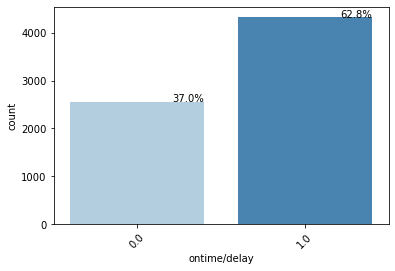

In [13]:
ax = sns.countplot(x="ontime/delay", data=df_clean, palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_clean))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right')

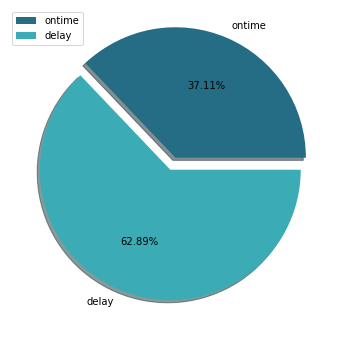

In [14]:
plt.figure(figsize= (10, 6))
labels = ["ontime", "delay"]
explode = [0.1, 0]
plt.pie(df_clean['ontime/delay'].value_counts(ascending=True) ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.legend()
plt.show()

> Melakukan aggregating count untuk menghiutung jumlah perjalanan setiap supplier dalam melakukan pengiriman secara ontime lalu mengurutkannya dari yang terbesar hingga terkecil dengan ranking 10 teratas

In [15]:
df_clean[df_clean['ontime/delay']==0][['supplierNameCode', 'TRANSPORTATION_DISTANCE_IN_KM']].groupby(['supplierNameCode']).agg('count').sort_values('TRANSPORTATION_DISTANCE_IN_KM', 
                                                                                                                   ascending=False).head(10).style.background_gradient(cmap='Wistia')

,TRANSPORTATION_DISTANCE_IN_KM
supplierNameCode,
SUNITA CARRIERS PRIVATE LIMITED,172
A S TRANSPORTS,161
SR TRANSPORTS,120
SRI PACHIAMMAN TRANSPORT,93
VJ LOGISTICS,83
DISTRIBUTION LOGISTICS INFRASTRUCTURE PRIVATE LTD,74
NAMAKKAL SRI ANJINAYA TRANSPORT,74
ARVINTH TRANSPORT,64
EKTA TRANSPORT COMPANY,61


> Melakukan aggregating count untuk menghiutung jumlah perjalanan setiap supplier dalam melakukan pengiriman secara delay lalu mengurutkannya dari yang terbesar hingga terkecil dengan ranking 10 teratas

In [16]:

df_clean[df_clean['ontime/delay']==1][['supplierNameCode', 'TRANSPORTATION_DISTANCE_IN_KM']].groupby(['supplierNameCode']).agg('count').sort_values('TRANSPORTATION_DISTANCE_IN_KM', 
                                                                                                                   ascending=False).head(10).style.background_gradient(cmap='Wistia')

,TRANSPORTATION_DISTANCE_IN_KM
supplierNameCode,
SUNITA CARRIERS PRIVATE LIMITED,321
A S TRANSPORTS,314
Unknown,251
K.RAMACHANDRAN TRANSPORTS,214
S.B.TRANSPORT COMPANY,183
EKTA TRANSPORT COMPANY,171
TRANS CARGO INDIA,165
A P R TRAILLER SERVICE,156
SHRI SAI ENTERPRISES,133


> Melakukan aggregating total perjalanan tiap supplier dengan cara menghitung total kilometer yang telah ditempuh secara ontime sampai tujuan

In [17]:
df_clean[df_clean['ontime/delay']==0][['supplierNameCode', 'TRANSPORTATION_DISTANCE_IN_KM']].groupby(['supplierNameCode']).agg('sum').sort_values('TRANSPORTATION_DISTANCE_IN_KM', 
                                                                                                                   ascending=False).head(10)

,TRANSPORTATION_DISTANCE_IN_KM
supplierNameCode,
EKTA TRANSPORT COMPANY,89964.00
TRANS CARGO INDIA,63530.00
KRC Logistics,60480.00
Arvinth Transport,40287.00
VJ Logistics,38751.00
SUNITA CARRIERS PRIVATE LIMITED,32678.05
R.Sai logistics india PVT.LTD,31400.00
EKTA TRAVELS,30225.00
SR TRANSPORTS,25065.00


> Melakukan aggregating total perjalanan tiap supplier dengan cara menghitung total kilometer yang telah ditempuh secara delay sampai tujuan

In [18]:
df_clean[df_clean['ontime/delay']==1][['supplierNameCode', 'TRANSPORTATION_DISTANCE_IN_KM']].groupby(['supplierNameCode']).agg('sum').sort_values('TRANSPORTATION_DISTANCE_IN_KM', 
                                                                                                                   ascending=False).head(10)

,TRANSPORTATION_DISTANCE_IN_KM
supplierNameCode,
TRANS CARGO INDIA,378475.00
EKTA TRANSPORT COMPANY,318670.00
Unknown,273800.25
KRC Logistics,147654.00
R.Sai logistics india PVT.LTD,110251.00
Rajdhani Roadways,83563.00
SUNITA CARRIERS PRIVATE LIMITED,68929.25
PAWAN R LOGISTICS,57135.00
VJ Logistics,53963.00


> Melakukan sortir dari `trip_star_date` pertama kali yang diinput dalam dataset

In [19]:
df['trip_start_date'] = pd.to_datetime(df['trip_start_date'], format='%m/%d/%Y %H:%M')

# Mengurutkan DataFrame berdasarkan kolom 'trip_start_date'
df_sorted = df.sort_values(by='trip_start_date', ascending=True)

# Menampilkan hasil
(df_sorted)

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,Planned_ETA,Current_Location,DestinationLocation,actual_eta,Curr_lat,Curr_lon,ontime,delay,OriginLocation_Code,DestinationLocation_Code,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
6868,JTECH,WDSBKTP44502,Regular,2019-04-15 15:15:13,KA21A5090,"Mugabala, Bangalore Rural, Karnataka","Peenya Small Industries, Bangalore, Karnataka","16.560192249175344,80.792293091599547","13.196312912801169,77.708156925688726",2019-06-14 15:20:12,1899-12-30 04:06:00,"Shed No 60, Medahalli Kadugodi Road, Virgonaga...","Peenya Small Industries, Bangalore, Karnataka",1899-12-30 03:21:00.000,13.025077,77.723114,NaN,R,V0048673,LE005419,1899-12-30 00:00:00,1899-12-30 03:21:00,41.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,INSRT-VLV ST INTK
6264,NaN,WDSBKTP49392,Regular,2019-06-10 13:17:44,WB59B9152,"Sonai, Kolkata, West Bengal","Kalyani, Nadia, West Bengal","23.525267916088961,87.264424348570884","22.952176370977448,88.4571405591546",NaT,1899-12-30 08:58:00,NaN,"Kalyani, Nadia, West Bengal",1899-12-30 08:13:00.000,NaN,NaN,G,NaN,V0045772,LE005821,1899-12-30 00:00:00,1899-12-30 08:13:00,51.0,40 FT Flat Bed Multi-Axle 27MT - Trailer,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55471,SUNITA CARRIERS PRIVATE LIMITED,FXUWB-LID COVER
5910,NaN,WDSBKTP41957,Regular,2019-03-18 12:19:22,AP26TE1258,"Sedarapet, India","Redhills, Chennai, Tamil Nadu, India","12.0001,79.74839949999999","13.1992334,80.196693",NaT,2019-03-19 11:45:22,NaN,"Redhills, Chennai, Tamil Nadu, India",2019-03-19 11:00:22.000,NaN,NaN,G,NaN,CHESEDLTLCCA1,CHEVADTDUCCA1,2019-03-18 12:19:22,2019-03-19 11:00:22,NaN,24 | 26 FT Taurus Open 21MT - HCV,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55075,Sri Ayyappan Agencies,COOLANT HOSE / RADIATOR TO ENGINE
6631,NaN,WDSBKTP41973,Regular,2019-03-18 16:24:18,TN20AJ1188,"Kanchipuram, Tamil Nadu, India","Periyapatti, Tamil Nadu, India","12.8341735,79.7036402","11.2044996,78.1421905",NaT,2019-03-20 18:00:18,NaN,"Periyapatti, Tamil Nadu, India",2019-03-20 17:15:18.000,NaN,NaN,G,NaN,CHEMANLTLWHA1,CHEPARPUBTPA1,2019-03-18 16:24:18,2019-03-20 17:15:18,NaN,22 FT Taurus Open 16MT - HCV,275.0,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,999,Unknown,A114 Alternator(New Versa)
5912,NaN,WDSBKTP41974,Regular,2019-03-18 16:56:02,TN25AT7677,"Sedarapet, India","Mylasandra, Bengaluru, Karnataka, India","12.0001,79.74839949999999","12.853929,77.6178125",NaT,2019-03-20 12:38:02,NaN,"Mylasandra, Bengaluru, Karnataka, India",2019-03-20 11:53:02.000,NaN,NaN,G,NaN,CHESEDLTLCCA1,HOSBYALTLWHA1,2019-03-18 16:56:02,2019-03-20 11:53:02,NaN,24 | 26 FT Taurus Open 21MT - HCV,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,999,Unknown,COOLANT HOSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590,KRC LOGISTICS,AEIBK2017781,Regular,2020-10-03 18:26:21,TN14T6171,"Shive, Pune, Maharashtra","Jagadambigainagar, Tiruvallur, Tamil Nadu","18.750621,73.87719","13.087428,80.184717",2020-07-14 14:05:15,2020-10-07 22:26:21,"TVS 40 Feet Rd, TVS Industries, Korattur, Chen...","Jagadambigainagar, Tiruvallur, Tamil Nadu",2020-07-14 14:17:20.017,13.107348,80.191410,G,NaN,PUNBUDBILCCA3,CHEPADBILCCA4,2020-10-03 18:26:21,2020-03-14 11:43:00,1300.0,32 FT Multi-Axle 14MT - HCV,NaN,MAHESHKUMAR N,9.688430e+09,BILGCCHE02,Brakes india private ltd,67829,KRC Logistics,AUTO PARTS
2046,CONSENT TRACK,AEIBK2017783,Regular,2020-10-03 19:05:53,TN30BK2047,"Perukkaranai, Kanchipuram, Tamil Nadu","Shive, Pune, Maharashtra","12.425747,79.880083","18.750621,73.87719",2020-07-29 17:35:13,2020-10-07 23:05:53,"Unnamed Road, Kurali, Maharashtra 412105, India","Shive, Pune, Maharashtra",2020-07-29 18

Menghapus kolom `ontime` dan `delay` karena sudah diwakili oleh kolom `ontime/delay`

In [20]:
df_clean = df_clean.drop(['ontime', 'delay'], axis=1)

### Feature Selection

Membuat heatmap untuk mengetahui besarnya nilai keterkaitan antara fitur yang bersifat numeric dengan kolom target, Jika nilai terlalu kecil maka layak dieliminasi

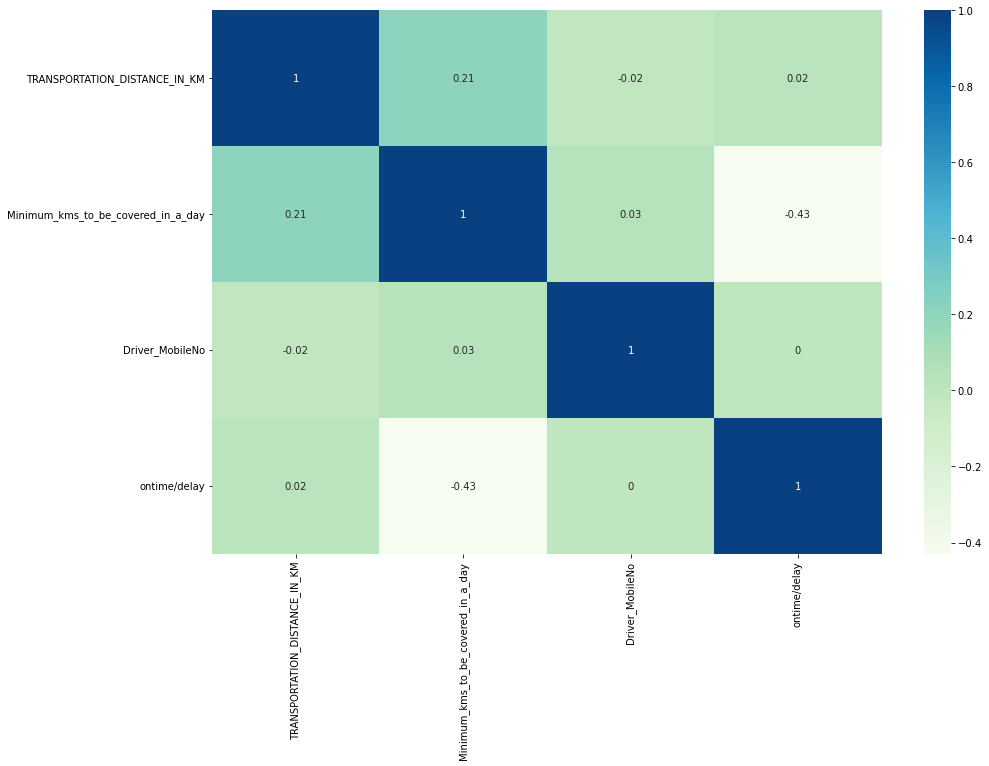

In [21]:
selected_columns = ['TRANSPORTATION_DISTANCE_IN_KM', 'Minimum_kms_to_be_covered_in_a_day', 'Driver_MobileNo', 'ontime/delay']
df_selected = df_clean[selected_columns]
plt.figure(figsize=(15, 10))
sns.heatmap(round(df_selected.corr(method='kendall'), 2), annot=True, mask=None, cmap='GnBu')
plt.show()

Berdasarkan hasil heatmap di atas maka hanya kolom `TRANSPORTATION_DISTANCE_IN_KM` yang memiliki nilai korelasi positif terhadap kolom target, sisanya bernilai 0 bahkan minus

In [22]:
df_clean = df_clean.drop(['Minimum_kms_to_be_covered_in_a_day', 'Driver_MobileNo'], axis=1)

In [23]:
df_clean.isnull().sum()

GpsProvider                       953
Market/Regular                      0
TRANSPORTATION_DISTANCE_IN_KM     712
vehicleType                       828
Driver_Name                      3429
customerNameCode                    0
supplierNameCode                    0
Material Shipped                    0
ontime/delay                       14
dtype: int64

### Handling Missing Values

Kolom terdiri dari kolom numerical dan categorical di mana kolom categorical pada dataset terdiri dari seluruh kolom kecuali kolom `TRANSPORTATION_DISTANCE_IN_KM` karena bersifat numerical.

### Handling Missing Values Numerical

In [24]:
skew = df_clean['TRANSPORTATION_DISTANCE_IN_KM'].skew()
skew

1.473087543265323

In [25]:
median_value = df_clean['TRANSPORTATION_DISTANCE_IN_KM'].median()
df_clean['TRANSPORTATION_DISTANCE_IN_KM'].fillna(median_value, inplace=True)

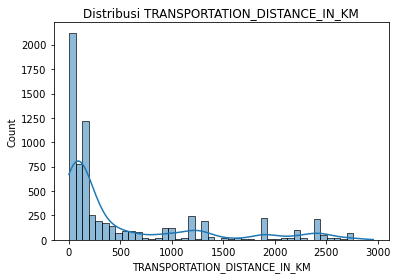

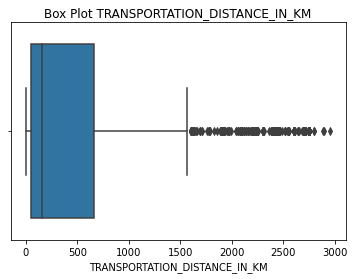

In [26]:
# Gambar distribusi dan skewness
sns.histplot(df_clean['TRANSPORTATION_DISTANCE_IN_KM'], kde=True)
plt.title('Distribusi TRANSPORTATION_DISTANCE_IN_KM')
plt.show()

# Gambar box plot
sns.boxplot(x=df_clean['TRANSPORTATION_DISTANCE_IN_KM'])
plt.title('Box Plot TRANSPORTATION_DISTANCE_IN_KM')
plt.show()

Mencari outlier yang ada di kolom `TRANSPORTATION_DISTANCE_IN_KM`

In [27]:
col=['TRANSPORTATION_DISTANCE_IN_KM']

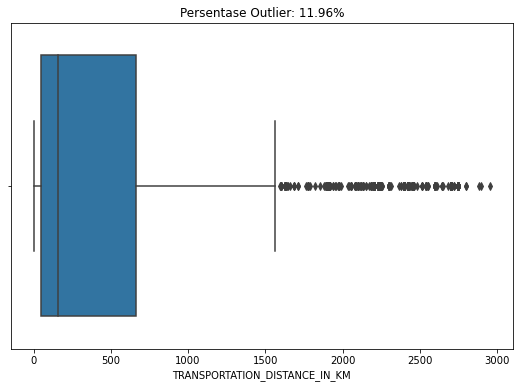

In [28]:
def outlier_analysis(df_clean, col):
    skewness = df_clean[col].skew()
    if skewness >= -0.5 and skewness <= 0.5:
        upper = df_clean[col].mean() + 3 * df_clean[col].std()
        lower = df_clean[col].mean() - 3 * df_clean[col].std()
    else:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        upper = Q3 + 1.5 * IQR
        lower = Q1 - 1.5 * IQR

    no_outliers = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]

    return outliers, no_outliers, upper, lower

# Memilih kolom yang ingin dianalisis
col_to_analyze = 'TRANSPORTATION_DISTANCE_IN_KM'

# Memanggil fungsi outlier_analysis hanya untuk kolom yang dipilih
out, no_out, up, low = outlier_analysis(df_clean, col_to_analyze)

# Membuat box plot hanya untuk kolom yang dipilih
plt.figure(figsize=(9, 6))
sns.boxplot(df_clean[col_to_analyze])
plt.title('Persentase Outlier: {:.2f}%'.format(len(out) * 100 / len(df_clean)))
plt.show()


### Handling Missing Values Categorical

In [29]:
# List kolom yang ingin diisi dengan "unknown"
columns_to_fill_unknown = ['GpsProvider',  'vehicleType', 'Driver_Name']

# Mengisi nilai yang hilang dengan "unknown" pada kolom-kolom tertentu
df_clean[columns_to_fill_unknown] = df_clean[columns_to_fill_unknown].fillna('unknown')

# Menampilkan DataFrame setelah pengisian nilai yang hilang
df_clean

,GpsProvider,Market/Regular,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Driver_Name,customerNameCode,supplierNameCode,Material Shipped,ontime/delay
0,CONSENT TRACK,Market,320.0,unknown,unknown,Ashok leyland limited,VIJAY TRANSPORT,BRACKET / GRAB HANDLE,1.0
1,VAMOSYS,Regular,103.0,unknown,RAMESH,Daimler india commercial vehicles pvt lt,VJ LOGISTICS,ZB MODEL PLATE / 3143,0.0
2,CONSENT TRACK,Regular,300.0,unknown,GIRI,Lucas tvs ltd,G.S. TRANSPORT,LETTERING / FUSO,0.0
3,VAMOSYS,Regular,61.0,unknown,RAVI,Daimler india commercial vehicles pvt lt,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD,0.0
4,VAMOSYS,Regular,240.0,unknown,TAMIL,Lucas tvs ltd,SR TRANSPORTS,WISHBONE / V ROD/HDT,0.0
...,...,...,...,...,...,...,...,...,...
6875,JTECH,Regular,12.0,25 FT Open Body 21MT,unknown,Larsen & toubro limited,A S TRANSPORTS,TOOL KIT SET,0.0
6876,JTECH,Regular,31.0,40 FT 3XL Trailer 35MT,unknown,Larsen & toubro limited,A S TRANSPORTS,CONTROL LEVER ASSY,0.0
6877,JTECH,Regular,49.0,40 FT 3XL Trailer 35MT,unknown,Larsen & toubro limited,A S TRANSPORTS,SPARE PARTS AUTOMOBILE,0.0
6878,JTECH,Regular,49.0,40 FT 3XL Trailer 35MT,unknown,Larsen & toubro limited,A S TRANSPORTS,SPARE PARTS AUTOMOBILE,1.0


Mengisi missing values di kolom target dengan nilai 0 karena pengiriman tetap ontime 

In [30]:
df_clean['ontime/delay'] = df_clean['ontime/delay'].fillna(0)

In [31]:
df_clean.isnull().sum()

GpsProvider                      0
Market/Regular                   0
TRANSPORTATION_DISTANCE_IN_KM    0
vehicleType                      0
Driver_Name                      0
customerNameCode                 0
supplierNameCode                 0
Material Shipped                 0
ontime/delay                     0
dtype: int64

In [32]:
df_clean.describe()

,TRANSPORTATION_DISTANCE_IN_KM,ontime/delay
count,6880.000000,6880.000000
mean,513.096737,0.627616
std,728.576753,0.483475
min,0.000000,0.000000
25%,45.925000,0.000000
50%,160.000000,1.000000
75%,660.000000,1.000000
max,2954.700000,1.000000


### Encoding Ordinal
Melakukan Encoding kepada kolom kolom categorikal yang diurutkan berdasarkan jumlah data terbanyak di setiap nama unique pada setiap kolom kategorikal.

In [33]:
# Menghitung jumlah count tiap unique value dalam setiap kolom
count_mapping = {}
for column in df_clean.select_dtypes(include=['object']).columns:
    count_mapping[column] = df_clean[column].value_counts().index.tolist()

# Mengganti nilai tiap kolom dengan urutan indeks pada count_mapping
for column in count_mapping:
    df_clean[column] = df_clean[column].apply(lambda x: count_mapping[column].index(x) if x in count_mapping[column] else x)

# Menampilkan hasil
df_clean

,GpsProvider,Market/Regular,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Driver_Name,customerNameCode,supplierNameCode,Material Shipped,ontime/delay
0,0,1,320.0,2,0,4,86,301,1.0
1,2,0,103.0,2,27,2,20,365,0.0
2,0,0,300.0,2,543,3,82,659,0.0
3,2,0,61.0,2,5,2,23,417,0.0
4,2,0,240.0,2,123,3,14,656,0.0
...,...,...,...,...,...,...,...,...,...
6875,4,0,12.0,18,0,0,2,771,0.0
6876,4,0,31.0,0,0,0,2,1406,0.0
6877,4,0,49.0,0,0,0,2,5,0.0
6878,4,0,49.0,0,0,0,2,5,1.0


### Mengukur nilai korelasi fitur kategorikal dengan kolom target dengan menggunakan chi square dan p-value

In [34]:
from scipy.stats import chi2_contingency

# Kolom-kolom kategorikal
kolom_kategorikal = ['GpsProvider', 'Market/Regular ' , 'vehicleType', 'Driver_Name', 'customerNameCode', 'supplierNameCode', 'Material Shipped']

# Matriks kontingensi untuk setiap kolom kategorikal terhadap target
for kolom in kolom_kategorikal:
    contingency_table = pd.crosstab(df_clean[kolom], df_clean['ontime/delay'])
    
    # Melakukan uji Chi-Square
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    print(f'Korelasi antara {kolom} dan ontime/delay:')
    print(f'Chi-Square Value: {chi2}')
    print(f'p-value: {p}')
    print('---------------------')


Korelasi antara GpsProvider dan ontime/delay:
Chi-Square Value: 3666.4962599207324
p-value: 0.0
---------------------
Korelasi antara Market/Regular  dan ontime/delay:
Chi-Square Value: 48.42902489383889
p-value: 3.424617444619715e-12
---------------------
Korelasi antara vehicleType dan ontime/delay:
Chi-Square Value: 2624.9751919076202
p-value: 0.0
---------------------
Korelasi antara Driver_Name dan ontime/delay:
Chi-Square Value: 2619.3580123729644
p-value: 3.9842774560152525e-83
---------------------
Korelasi antara customerNameCode dan ontime/delay:
Chi-Square Value: 1395.500759087536
p-value: 2.303852223573272e-268
---------------------
Korelasi antara supplierNameCode dan ontime/delay:
Chi-Square Value: 3003.6271493729237
p-value: 0.0
---------------------
Korelasi antara Material Shipped dan ontime/delay:
Chi-Square Value: 2270.416948130136
p-value: 9.746574929461024e-44
---------------------


Berdasarkan hasil di atas apabila nilai P-value di setiap berada di bawah -0.05 dan di atas 0.05 maka kolom tersebut dinyatakan tidak memilii korelasi yang kuat terhadap kolom target dengan demikian kolom `Market/Regular `, `Driver_Name`, `customerNameCode `, dan `Material Shipped` tidak diperlukan dalam penelitian lebih lanjut

In [35]:
df_clean = df_clean.drop(['Market/Regular ', 'Driver_Name', 'customerNameCode', 'Material Shipped'], axis=1)

### Data Split

In [36]:
X = df_clean.drop('ontime/delay', axis=1)
y = df_clean['ontime/delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(5504, 4)
(1376, 4)
(5504,)
(1376,)


## Model Definition

In [37]:
logreg = LogisticRegression(random_state=0)
svc = SVC(random_state=0)
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

## Model Training

In [38]:
#Logistic regression
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [39]:
#SVM
svc.fit(X_train, y_train)

SVC(random_state=0)

In [40]:
#DecisionTreeClassifier
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [41]:
#RandomForestClassifier
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## Model Evaluation

### Logistic Regression

In [42]:
y_predLR_train = logreg.predict(X_train)
y_predLR_test = logreg.predict(X_test)

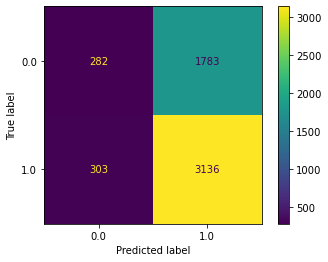

In [43]:
cm = confusion_matrix(y_train, y_predLR_train, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)

disp.plot()
plt.show()

In [44]:
print(classification_report(y_train,y_predLR_train))

              precision    recall  f1-score   support

         0.0       0.48      0.14      0.21      2065
         1.0       0.64      0.91      0.75      3439

    accuracy                           0.62      5504
   macro avg       0.56      0.52      0.48      5504
weighted avg       0.58      0.62      0.55      5504



In [45]:
print(classification_report(y_test,y_predLR_test))

              precision    recall  f1-score   support

         0.0       0.45      0.15      0.22       497
         1.0       0.65      0.90      0.76       879

    accuracy                           0.63      1376
   macro avg       0.55      0.52      0.49      1376
weighted avg       0.58      0.63      0.56      1376



Berdasarkan visualisasi di atas, ketika model membaca kelas 0 dan memprediksi kelas 0 maka data yang diprediksi dengan benar adalah 282 data True Positive.

Ketika model terbaca kelas 0 namun prediksi yang keluar adalah kelas 1 maka data yang dinyatakan salah prediksi adalah data 1783 False Negative

Saat model terbaca kelas 1 namun diprediksi masuk kelas 0 maka datanya sebanyak 303 data False Positive

bila data yang dimasukkan adalah prediksi kelas 1 kelas 1 maka data yang diprediksi benar sebanyak 3136 data True Negative

dengan model ini hasilnya `goodfit` karena nilai `accuracy` saat training `62%` dan saat testing `63%`

### SVM

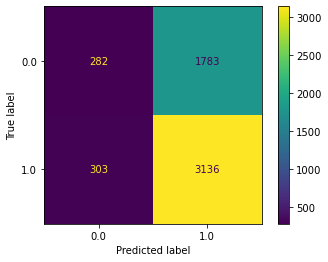

In [46]:
y_predSVM_train = svc.predict(X_train)
y_predSVM_test = svc.predict(X_test)

cm = confusion_matrix(y_train, y_predLR_train, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)

disp.plot()
plt.show()

In [47]:
print(classification_report(y_train,y_predSVM_train))
print(classification_report(y_test,y_predSVM_test))

              precision    recall  f1-score   support

         0.0       0.53      0.33      0.40      2065
         1.0       0.67      0.82      0.74      3439

    accuracy                           0.64      5504
   macro avg       0.60      0.58      0.57      5504
weighted avg       0.62      0.64      0.61      5504

              precision    recall  f1-score   support

         0.0       0.49      0.32      0.39       497
         1.0       0.68      0.82      0.74       879

    accuracy                           0.64      1376
   macro avg       0.59      0.57      0.56      1376
weighted avg       0.61      0.64      0.61      1376



Berdasarkan visualisasi di atas, ketika model membaca kelas 0 dan memprediksi kelas 0 maka data yang diprediksi dengan benar adalah 282 data True Positive.

Ketika model terbaca kelas 0 namun prediksi yang keluar adalah kelas 1 maka data yang dinyatakan salah prediksi adalah data 1783 False Negative

Saat model terbaca kelas 1 namun diprediksi masuk kelas 0 maka datanya sebanyak 303 data False Positive

bila data yang dimasukkan adalah prediksi kelas 1 kelas 1 maka data yang diprediksi benar sebanyak 3136 data True Negative

dengan model ini hasilnya `goodfit` karena nilai `accuracy` saat training `64%` dan saat testing `64%`

### DecisionTreeClassifier

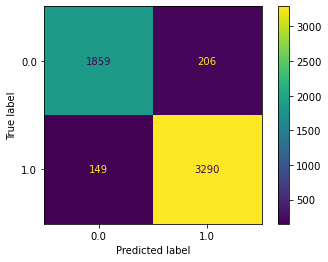

In [48]:
y_preddtc_train = dtc.predict(X_train)
y_preddtc_test = dtc.predict(X_test)

cm = confusion_matrix(y_train, y_preddtc_train, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)

disp.plot()
plt.show()

In [49]:
print(classification_report(y_train,y_preddtc_train))
print(classification_report(y_test,y_preddtc_test))

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91      2065
         1.0       0.94      0.96      0.95      3439

    accuracy                           0.94      5504
   macro avg       0.93      0.93      0.93      5504
weighted avg       0.94      0.94      0.94      5504

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82       497
         1.0       0.90      0.89      0.90       879

    accuracy                           0.87      1376
   macro avg       0.86      0.86      0.86      1376
weighted avg       0.87      0.87      0.87      1376



Berdasarkan visualisasi di atas, ketika model membaca kelas 0 dan memprediksi kelas 0 maka data yang diprediksi dengan benar adalah 1859 data True Positive.

Ketika model terbaca kelas 0 namun prediksi yang keluar adalah kelas 1 maka data yang dinyatakan salah prediksi adalah data 206 False Negative

Saat model terbaca kelas 1 namun diprediksi masuk kelas 0 maka datanya sebanyak 149 data False Positive

bila data yang dimasukkan adalah prediksi kelas 1 kelas 1 maka data yang diprediksi benar sebanyak 3290 data True Negative

dengan model ini hasilnya `overfitting` karena nilai `accuracy` saat training `94%` dan saat testing mengalami penurunan yang signifikan yaitu `87%`

### RandomForestClassifier

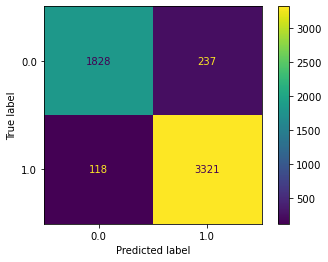

In [50]:
y_predrfc_train = rfc.predict(X_train)
y_predrfc_test = rfc.predict(X_test)

cm = confusion_matrix(y_train, y_predrfc_train, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)

disp.plot()
plt.show()

In [51]:
print(classification_report(y_train,y_predrfc_train))
print(classification_report(y_test,y_predrfc_test))

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91      2065
         1.0       0.93      0.97      0.95      3439

    accuracy                           0.94      5504
   macro avg       0.94      0.93      0.93      5504
weighted avg       0.94      0.94      0.94      5504

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       497
         1.0       0.90      0.92      0.91       879

    accuracy                           0.89      1376
   macro avg       0.88      0.87      0.87      1376
weighted avg       0.88      0.89      0.88      1376



Berdasarkan visualisasi di atas, ketika model membaca kelas 0 dan memprediksi kelas 0 maka data yang diprediksi dengan benar adalah 1828 data True Positive.

Ketika model terbaca kelas 0 namun prediksi yang keluar adalah kelas 1 maka data yang dinyatakan salah prediksi adalah data 237 False Negative

Saat model terbaca kelas 1 namun diprediksi masuk kelas 0 maka datanya sebanyak 118 data False Positive

bila data yang dimasukkan adalah prediksi kelas 1 kelas 1 maka data yang diprediksi benar sebanyak 3321 data True Negative

dengan model ini hasilnya `overfitting` karena nilai `accuracy` saat training `94%` dan saat testing mengalami penurunan yang tidak terlalu jauh yaitu `89%`

> Model Random Forest Classifier adalah model paling terbaik dibandingkan model yang lain karena accuracy saat training maupun testing memiliki nilai `accuracy` tertinggi.

In [54]:
#Logistic Regression
log_model_train_cross_val = cross_val_score(logreg, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', log_model_train_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', log_model_train_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.6228185946660061
accuracy Score - Std - Cross Validation  :  0.005571379014218021


In [55]:
#SVM
svm_model_train_cross_val = cross_val_score(svc, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', svm_model_train_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', svm_model_train_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.6395354636281066
accuracy Score - Std - Cross Validation  :  0.013533985809709142


In [56]:
#Decission Tree

dt_modelt_rain_cross_val = cross_val_score(dtc, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', dt_modelt_rain_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', dt_modelt_rain_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.8837228965403352
accuracy Score - Std - Cross Validation  :  0.012581869797563242


In [57]:
#Random Forest

rf_modelt_rain_cross_val = cross_val_score(rfc, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', rf_modelt_rain_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', rf_modelt_rain_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.8964400957806952
accuracy Score - Std - Cross Validation  :  0.008231165725493953


In [58]:
rata = []
dev = []
for i in [log_model_train_cross_val,svm_model_train_cross_val,dt_modelt_rain_cross_val,rf_modelt_rain_cross_val]:
    rata.append(i.mean())
    dev.append(i.std())

In [59]:
model = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
hasil_cros_validation = pd.DataFrame(model)
hasil_cros_validation['mean']=rata
hasil_cros_validation['std']=dev

In [60]:
hasil_cros_validation.sort_values(by= 'mean' , ascending = False) 

,0,mean,std
3,Random Forest,0.896440,0.008231
2,Decision Tree,0.883723,0.012582
1,SVM,0.639535,0.013534
0,Logistic Regression,0.622819,0.005571


### Setelah Hyperparameter Tuning
Melalkukan hyperparameter tuning dengan mencari parameter terbaik dan membandingkannya dengan baseline
Diketahui bahwa model`Random Forest Classifier` sebelumnya dinyatakan sebagai model terbaik dibanding tiga model lainnya maka dari itu hyper parameter tunning akan dilakukan untuk model `Random Forest Classifier`

In [61]:
# Parameter yang akan diuji
params = {
    'n_estimators': [10, 15, 20],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

# Model Random Forest
rf_model = RandomForestClassifier(random_state=0)

# GridSearchCV
grid_search_rf = GridSearchCV(rf_model,
                               params, 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True)
grid_search_rf.fit(X_train, y_train)

# Hasil hyperparameter tuning
best_params = grid_search_rf.best_params_
best_estimator = grid_search_rf.best_estimator_

In [62]:
grid_search_rf.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 15}

In [63]:
grid_search_rf.best_score_

0.9011637354471143

In [64]:
grid_search_rf.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=15,
                       random_state=0)

In [65]:
model = grid_search_rf.best_estimator_

In [66]:
model.fit(X_train, y_train)

model_train = model.predict(X_train)
model_test = model.predict(X_test)

print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

         0.0       0.96      0.81      0.87      2065
         1.0       0.89      0.98      0.93      3439

    accuracy                           0.91      5504
   macro avg       0.92      0.89      0.90      5504
weighted avg       0.92      0.91      0.91      5504

              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84       497
         1.0       0.88      0.96      0.92       879

    accuracy                           0.89      1376
   macro avg       0.90      0.87      0.88      1376
weighted avg       0.89      0.89      0.89      1376



> Hasil perbandingan model `Random Forest` dengan parameter baseline dan hypermeter tunning adalah diketahui bahwa parameter baseline lebih baik dibandingkan dengan hyperparameter tunning karena meskipun nilai `accuracy` saat testing sama sama `89%` namun nilai `accuracy` training lebih baik parameter baseline yaitu sebesar `94%` sedangkan hasil hyperparameter tuning `91%`

## Model Inference
Tahap ini dilakukan untuk menguji model yang telah dibuat dengan 10 data random yang diambil dari dataset utama sebagai data sampel

In [67]:
df_sample = df_clean.sample(n=10, random_state=171)

In [68]:
df_sample

,GpsProvider,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,supplierNameCode,ontime/delay
1234,0,980.0,12,251,0.0
2604,6,1199.0,1,8,1.0
1569,0,2240.0,4,26,1.0
1102,2,175.0,2,14,0.0
1044,11,1000.0,1,54,0.0
928,0,427.0,0,1,1.0
5002,0,34.0,0,7,1.0
2448,2,1290.0,1,28,1.0
3265,0,1650.0,10,289,1.0
5239,0,35.0,0,45,1.0


In [69]:
x_inf = df_sample.drop(['ontime/delay'], axis=1)

In [70]:
Inference = model.predict(x_inf)
Inference 

array([1., 1., 1., 0., 0., 1., 1., 0., 1., 1.])

In [71]:
inference_df = pd.DataFrame(Inference)

In [72]:
inference_df.columns = ['prediction']

In [73]:
inference_df

,prediction
0,1.0
1,1.0
2,1.0
3,0.0
4,0.0
5,1.0
6,1.0
7,0.0
8,1.0
9,1.0


In [74]:
df_combined = pd.concat([df_sample.reset_index(drop=True), inference_df], axis=1)
df_combined


,GpsProvider,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,supplierNameCode,ontime/delay,prediction
0,0,980.0,12,251,0.0,1.0
1,6,1199.0,1,8,1.0,1.0
2,0,2240.0,4,26,1.0,1.0
3,2,175.0,2,14,0.0,0.0
4,11,1000.0,1,54,0.0,0.0
5,0,427.0,0,1,1.0,1.0
6,0,34.0,0,7,1.0,1.0
7,2,1290.0,1,28,1.0,0.0
8,0,1650.0,10,289,1.0,1.0
9,0,35.0,0,45,1.0,1.0


Berdasarkan model inference yang dilakukan dari 10 data yang diinput, 8 dari 10 data memiliki prediksi sesuai dengan data aslinya

## Kesimpulan

> 1. Pada penelitian ini telah membuat code python untuk persamaan matrix covariance

> 2. Berdasarkan hasil explore dataset diketahui bahwa supplier `SUNITA CARRIERS PRIVATE LIMITED` adalah supplier yang paling banyak jumlah perjalanan secara `ontime` dan juga jumlah perjalanan secara `delay` dibanding supplier lainnya. 

> 3. Dalam konteks jumlah jarak tempuh dalam km terbanyak secara `ontime`, supplier `EKTA TRANSPORT COMPANY` sedangkan jumlah jarak tempuh yang paling banyak mengalami `delay` adalah supplier `TRANS CARGO INDIA`

> 4. Saat melakukan sortir, diketahui bahwa berdasarkan waktu input data pertama kali yaitu pada `1899-12-30`

> 5. Fitur-fitur yang mempengaruhi kolom target antara lain `GpsProvider`,	`TRANSPORTATION_DISTANCE_IN_KM`, `vehicleType`, dan `supplierNameCode`

> 6. Pada penilitian ini akan membuat machine learning dengan membandingkan 4 alghoritma yaitu 
- Logistic Regression
- SVM
- DecisionTreeClassifier
- Random Forest
diperoleh hasil bahwa `Random Forest` adalah pilihan yang tepat karena memiliki nilai `accuracy` dibanding algoritma yang lain meskipun terjadi `overfiting` karena saat training memiliki nilai `accuracy` sebesar `94%` , namun saat testing nilai `accuracy`menurun menjadi `89%`. 

> 7. Perbandingan model dengan cara cross validation diperoleh hasil `Random Forest Classifier` adalah model terbaik untuk menangani dataset ini karena memiliki nilai `mean` tertinggi yaitu `0.896440	` dan nilai standar deviasi yang mendekati 0 yaitu `0.008231`

> 8. Perbandingan parameter baseline dan hyperparameter tunning untuk model `Random Forest` adalah parameter baseline lebih baik karena `accuracy` saat training yaitu sebesar `94%` lebih tinggi dibanding hasil training hyperparameter yang hanya sebesar `91%`

> 9. Model Inference menunjukan saat machine learning melakukan prediksi, diketahui bahwa 8 dari 10 data hasil nprediksi sesuai dengan data inference

